# Desafío 15-07

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

## Desafío 1: Lectura de archivos

Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.

Importe la base de datos bfi.csv y asígnela a un objeto df.

Solicite las primeras 5 observaciones con head.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import factor_analyzer as factor
import missingno as msngo
import seaborn as sns
import statsmodels.formula.api as smf


df=pd.read_csv('bfi.csv')

df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento

Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.

Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.

Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [5]:
#Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.

df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


<Figure size 288x288 with 0 Axes>

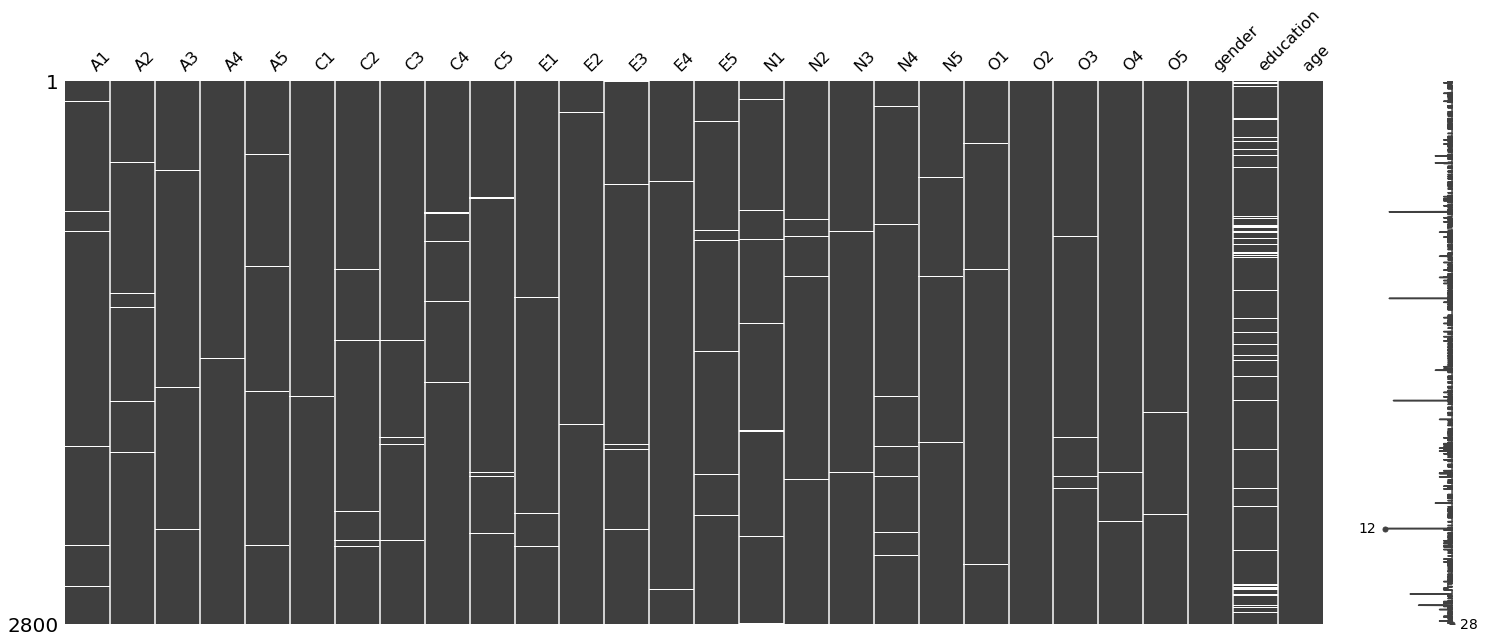

In [6]:
#Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.

plt.figure(figsize=(4,4))
msngo.matrix(df);

**Comertario:** La variable que presenta una mayor tasa de datos perdidos es el nivel educatico ***Education***, destacandose muy por encima del resto de variables.

<Figure size 288x288 with 0 Axes>

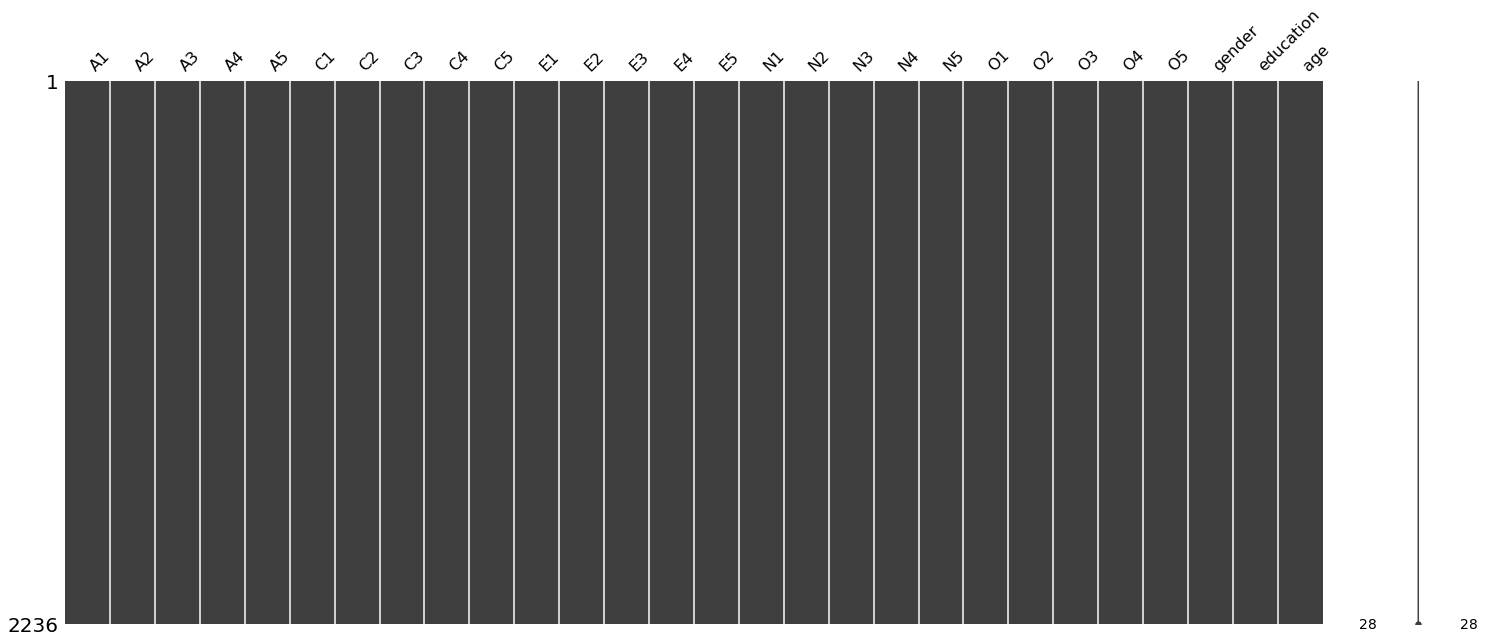

In [7]:
# Genere un nuevo objeto donde almacenará la base sin valores perdidos.

df_depurado = df.dropna()

plt.figure(figsize=(4,4))
msngo.matrix(df_depurado);

## Desafío 3: Descripción

Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.

Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.

Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap.

Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [8]:
#Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.

df_pregunta = df_depurado.filter(['A1','A2','A3','A4','A5','C1','C2','C3','C4','C5','E1','E2','E3','E4','E5','N1','N2',
                                  'N3','N4','N5','O1','O2','O3','O4','O5',], axis=1)

df_pregunta.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


In [9]:
#Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.

df_pregunta = df_pregunta.rename(columns={'A1': 'Soy indiferente a los sentimientos de otros.',
                                   'A2': 'Me preocupo del bienestar de otros.',
                                   'A3': 'Sé cómo confortar a otros.',
                                   'A4': 'Me agradan los niños.',
                                   'A5': 'Hago sentir tranquila a la gente.',
                                   'C1': 'Soy exacto en mi trabajo.',
                                   'C2': 'Sigo con mis tareas hasta que todo esté perfecto.',
                                   'C3': 'Hago cosas siguiendo un plan.',
                                   'C4': 'Hago cosas con el mínimo esfuerzo.',
                                   'C5': 'Pierdo mi tiempo.',
                                   'E1': 'No hablo mucho con las personas.',
                                   'E2': 'Me es dificil acercarme a otros.',
                                   'E3': 'Sé cómo cautivar gente.',
                                   'E4': 'Hago amigos de forma fácil.',
                                   'E5': 'Puedo tomar el cargo de las cosas.',
                                   'N1': 'Me enojo con facilidad.',
                                   'N2': 'Me irrito con facilidad.',
                                   'N3': 'Tengo cambios de humor frecuentes.',
                                   'N4': 'Usualmente me siento melancólico.',
                                   'N5': 'Entro en pánico con facilidad.',
                                   'O1': 'Estoy lleno de ideas.',
                                   'O2': 'Evito leer material difícil.',
                                   'O3': 'Tiendo a llevar la conversación a niveles más altos.',
                                   'O4': 'Dedico tiempo a la reflexión de cosas.',
                                   'O5': 'No profundizaré sobre una materia específica.'})

df_pregunta.head()

,Soy indiferente a los sentimientos de otros.,Me preocupo del bienestar de otros.,Sé cómo confortar a otros.,Me agradan los niños.,Hago sentir tranquila a la gente.,Soy exacto en mi trabajo.,Sigo con mis tareas hasta que todo esté perfecto.,Hago cosas siguiendo un plan.,Hago cosas con el mínimo esfuerzo.,Pierdo mi tiempo.,...,Me enojo con facilidad.,Me irrito con facilidad.,Tengo cambios de humor frecuentes.,Usualmente me siento melancólico.,Entro en pánico con facilidad.,Estoy lleno de ideas.,Evito leer material difícil.,Tiendo a llevar la conversación a niveles más altos.,Dedico tiempo a la reflexión de cosas.,No profundizaré sobre una materia específica.
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


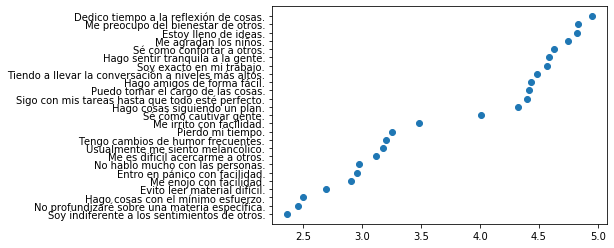

In [10]:
variable = []
mean = []

for colname, serie in df_pregunta.iteritems():
    
    variable.append(colname)
    mean.append(serie.mean())
    
df_plot = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.plot(df_plot['mean'], df_plot['var'],'o');

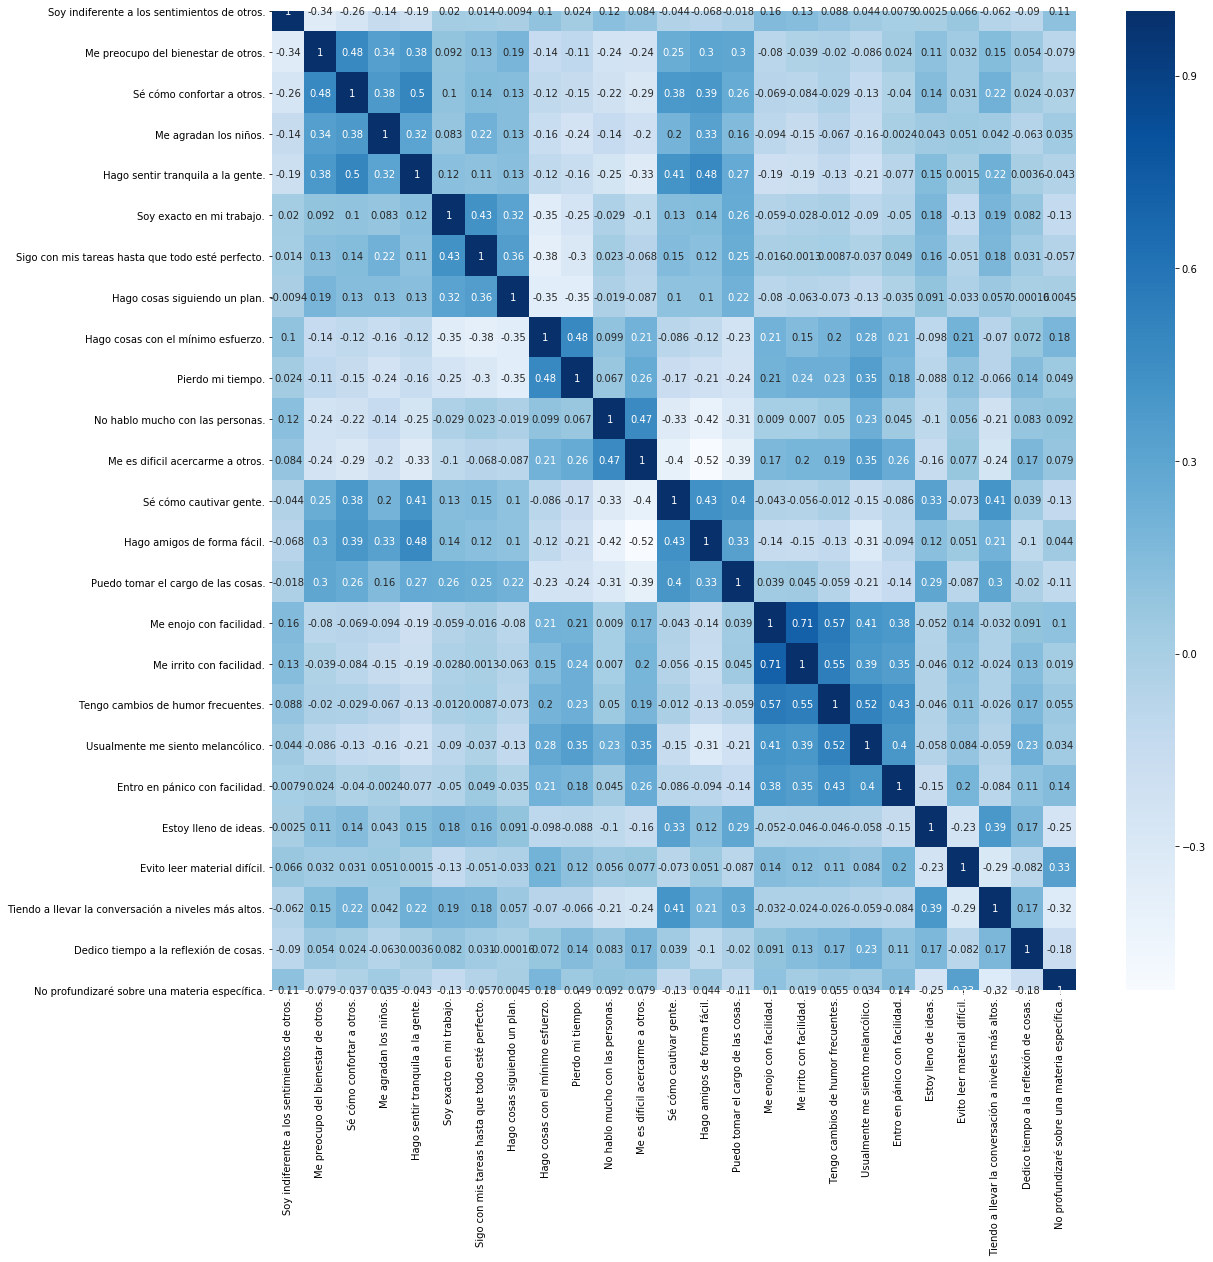

In [11]:
#Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap.

plt.figure(figsize=(18,18))
sns.heatmap(df_pregunta.corr(), cmap='Blues', annot=True);

**Comentario:** 

- Observamos un primer grupo de variables correlacionadas entre sí, la cuales apuntan a caracteristicas de una personalidad solidaria y empatica con los demás (Me preocupo del bienestar de otros, Sé cómo confortar a otros, Me agradan los niños y Hago sentir tranquila a la gente).

- Posteriormente, aparece un segundo grupo de variables correlacionadas las cuales indican rasgos de personalidad enfocados a seguir normas, pasos y poca flexibilidad a la improvisación (Soy exacto en mi trabajo, Sigo con mis tareas hasta que todo esté perfecto y Hago cosas siguiendo un plan).

- Con un nivel de correlación más bajo, aparecen varibles enfocadas a rasgos de personalidad extrovertida (Sé cómo cautivar gente, Hago amigos de forma fácil y Puedo tomar el cargo de las cosas).

- Finalmente, se observa una correlación entre variables que indican rasgos de personalidad neurotica (Me enojo con facilidad, Me irrito con facilidad, Tengo cambios de humor frecuentes, Usualmente me siento melancólico y Entro en pánico con facilidad).

## Desafío 4: Extracción de factores 

Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.

Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.

Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

Extraiga las cargas del modelo e identifique qué items están asociados a cada factor.

Comente sobre qué significa cada factor construído.

In [12]:
#Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis 
#factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.

factor.calculate_bartlett_sphericity(df_pregunta)

(16484.78165416042, 0.0)

**Comentario:** la prueba de esferacidad de Barlet, luego de realizar el contraste de hipotesis, sugiere que la matriz de
correlaciones no es igual a la matriz de identidad, con un valor $Chi-2=16.484,78$ y un $p-value=0,0$ por lo que se puede seguir con el análisis.

In [13]:
factor.calculate_kmo(df_pregunta)

(                                                         KMO
 Soy indiferente a los sentimientos de otros.        0.738005
 Me preocupo del bienestar de otros.                 0.834387
 Sé cómo confortar a otros.                          0.871681
 Me agradan los niños.                               0.870525
 Hago sentir tranquila a la gente.                   0.900699
 Soy exacto en mi trabajo.                           0.838225
 Sigo con mis tareas hasta que todo esté perfecto.   0.788569
 Hago cosas siguiendo un plan.                       0.849578
 Hago cosas con el mínimo esfuerzo.                  0.823776
 Pierdo mi tiempo.                                   0.861994
 No hablo mucho con las personas.                    0.841634
 Me es dificil acercarme a otros.                    0.883987
 Sé cómo cautivar gente.                             0.893156
 Hago amigos de forma fácil.                         0.878282
 Puedo tomar el cargo de las cosas.                  0.894127
 Me enoj

**Comentario:** obtenemos los puntaje KMO para cada item dentro de la batería de preguntas, los cuales presentan valores 
suoeriores al punto de corte (0,7), además observamos que el puntaje global indica unn buen valor para proseguir con el análisis facotial.

In [29]:
# Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.

factorize = factor.FactorAnalyzer()
factorize.analyze(data=df_pregunta, n_factors=10, rotation=None)


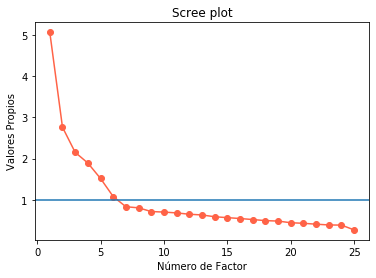

In [30]:
#Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

**Comentaro:** Observemos cuales factores poseen autovalor mayor o igual a $1$, de esta forma estaremos seleccionando aquellos que acumulan una mayor cantidad de varianza explicada. Para este modelo se sugiere seleccioanr los $6$ primeros factores. 

In [31]:
#Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.

factorize_1 = factor.FactorAnalyzer()
factorize_1.analyze(data=df_pregunta, n_factors=6, rotation=None)


In [17]:
#Extraiga las cargas del modelo e identifique qué items están asociados a cada factor.

factor_loadings = factorize_1.loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Soy indiferente a los sentimientos de otros.,-0.217818,-0.025323,0.147212,0.036770,-0.420779,0.294572
Me preocupo del bienestar de otros.,0.455915,0.295148,-0.197899,0.120086,0.344092,-0.184539
Sé cómo confortar a otros.,0.522146,0.305260,-0.253026,0.088980,0.273546,0.015334
Me agradan los niños.,0.399122,0.119116,-0.152263,0.264628,0.162489,0.025393
Hago sentir tranquila a la gente.,0.567112,0.183979,-0.262259,0.027891,0.166290,0.130115
Soy exacto en mi trabajo.,0.327575,0.121791,0.438554,0.147945,0.003235,0.104954
Sigo con mis tareas hasta que todo esté perfecto.,0.325170,0.181309,0.454576,0.318084,0.059215,0.170916
Hago cosas siguiendo un plan.,0.322018,0.046434,0.319860,0.329100,0.038197,0.037755
Hago cosas con el mínimo esfuerzo.,-0.472113,0.126126,-0.451212,-0.264980,0.011658,0.264059
Pierdo mi tiempo.,-0.485339,0.149672,-0.261761,-0.296567,0.098866,0.052008


**Comentario:** Consideraremos aquellas cargas mayores a $0,4$, lo que indica una aporte mayor a $40%$ a la formación del factor. 

In [18]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Soy indiferente a los sentimientos de otros.,,,,,,
Me preocupo del bienestar de otros.,0.46,,,,,
Sé cómo confortar a otros.,0.52,,,,,
Me agradan los niños.,,,,,,
Hago sentir tranquila a la gente.,0.57,,,,,
Soy exacto en mi trabajo.,,,0.44,,,
Sigo con mis tareas hasta que todo esté perfecto.,,,0.45,,,
Hago cosas siguiendo un plan.,,,,,,
Hago cosas con el mínimo esfuerzo.,,,,,,
Pierdo mi tiempo.,,,,,,


# Comente sobre qué significa cada factor construído.

**Factor 1:** Factor ***Líderes*** dado que aparece con mayor carga aquellos aspectos orientados a caracteristicas de dominio de grupos.

**Factor 2:** Factor ***Neuroticos***, en este factor aparece mejor representadas caracteristicas y sintomás asociados a esta conducta.

**Factor 3:** Factor ***Metódicos***, apareciendo con mayor impacto aquellas caracteristicas de seguir normas, planes y perfeccionismo.

**Factor 4:** Factor ***No apertura***, en este factor se representan mejor las caracteristicas de no ahondar ante ciertos temas.

**Factor 5:** Factor ***Solidarios***, se identifica con caracteristicas de empatía con otros. 

**Factor 6:** Factor ***Perezosos***, solo aparece como relevante la caracteristica de no aplicar ningun esfuerzo al realizar sus actividades.

## Desafío 5: Modelación de factores

Extraiga los puntajes del modelo factorial a su base de datos.

Grafique la densidad de cada uno con kdplot.

Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

$y= \beta_{0} + \beta_{1} * gender + \beta{2} * eduaction + \beta{3} * age + \epsilon_{1}$

In [19]:
#Extraiga los puntajes del modelo factorial a su base de datos.

extract_factor_scores = factorize.get_scores(df_pregunta)


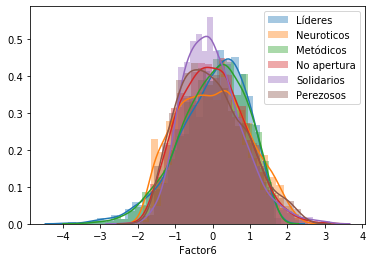

In [20]:
#Grafique la densidad de cada uno con kdplot.

sns.distplot(extract_factor_scores.loc[:, 'Factor1'], label="Líderes")
sns.distplot(extract_factor_scores.loc[:, 'Factor2'], label="Neuroticos")
sns.distplot(extract_factor_scores.loc[:, 'Factor3'], label="Metódicos")
sns.distplot(extract_factor_scores.loc[:, 'Factor4'], label="No apertura")
sns.distplot(extract_factor_scores.loc[:, 'Factor5'], label="Solidarios")
sns.distplot(extract_factor_scores.loc[:, 'Factor6'], label="Perezosos")
plt.legend()

**Comentario:** observamos que todos los factores tienen una distribución normal.

In [21]:
#Incluimos las cargas de los factores a la base de datos depurada

df_depurado['Factor1']= extract_factor_scores['Factor1']
df_depurado['Factor2']= extract_factor_scores['Factor2']
df_depurado['Factor3']= extract_factor_scores['Factor3']
df_depurado['Factor4']= extract_factor_scores['Factor4']
df_depurado['Factor5']= extract_factor_scores['Factor5']
df_depurado['Factor6']= extract_factor_scores['Factor6']

C:\Users\rehijo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rehijo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rehijo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

In [22]:
df_depurado.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,1.0,2,3.0,21,0.754731,0.636333,-0.155618,-0.586982,-0.564123,-0.382844
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1,2.0,19,0.909531,-0.708496,0.157544,-0.380904,-0.467452,-1.507011
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,1,1.0,21,0.894905,0.476405,-0.703120,-0.313212,0.862949,-0.794234
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,5.0,1,1.0,17,-0.589101,-0.658739,0.367419,0.250464,-1.185541,1.943606
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,1,5.0,68,-1.138930,0.825216,-1.025691,0.665071,0.602856,0.818922


In [23]:
model_lideres= smf.ols('Factor1 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2629
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.852
Time:                        19:42:46   Log-Likelihood:                -2379.2
No. Observations:                1804   AIC:                             4766.
Df Residuals:                    1800   BIC:                             4788.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0115      0.109     -0.106      0.916      -0.225       0.202
gender        -0.0195      0.046     -0.427      0.669      -0.109       0.070
education      0.0057      0.020      0.284      0.776      -0.033       0.045
age            0.0013      0.002      0.653      0.514      -0.003       0.005
==============================================================================
Omnibus:                      122.001   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.929
Skew:                          -0.674   Prob(JB):                     2.05e-32
Kurtosis:                       3.355   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***Líderes*** ninguna de estas variables resulta determinante.

In [24]:
model_lideres= smf.ols('Factor2 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9142
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.433
Time:                        19:42:46   Log-Likelihood:                -2446.9
No. Observations:                1804   AIC:                             4902.
Df Residuals:                    1800   BIC:                             4924.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0693      0.113     -0.613      0.540      -0.291       0.153
gender         0.0505      0.048      1.062      0.289      -0.043       0.144
education     -0.0227      0.021     -1.100      0.272      -0.063       0.018
age            0.0017      0.002      0.795      0.427      -0.002       0.006
==============================================================================
Omnibus:                      155.927   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.334
Skew:                           0.157   Prob(JB):                     9.65e-13
Kurtosis:                       2.201   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***Neuroticos*** ninguna de estas variables resulta determinante.

In [25]:
model_lideres= smf.ols('Factor3 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor3   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2053
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.893
Time:                        19:42:47   Log-Likelihood:                -2324.6
No. Observations:                1804   AIC:                             4657.
Df Residuals:                    1800   BIC:                             4679.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0060      0.106      0.057      0.955      -0.201       0.213
gender         0.0251      0.044      0.566      0.571      -0.062       0.112
education     -0.0053      0.019     -0.274      0.784      -0.043       0.033
age           -0.0008      0.002     -0.412      0.680      -0.005       0.003
==============================================================================
Omnibus:                       76.408   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.405
Skew:                          -0.531   Prob(JB):                     2.85e-19
Kurtosis:                       3.097   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***Metódicos*** ninguna de estas variables resulta determinante.

In [26]:
model_lideres= smf.ols('Factor4 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4998
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.682
Time:                        19:42:47   Log-Likelihood:                -2240.7
No. Observations:                1804   AIC:                             4489.
Df Residuals:                    1800   BIC:                             4511.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0488      0.101     -0.484      0.629      -0.247       0.149
gender        -0.0132      0.042     -0.312      0.755      -0.096       0.070
education      0.0193      0.018      1.046      0.296      -0.017       0.055
age            0.0006      0.002      0.293      0.770      -0.003       0.004
==============================================================================
Omnibus:                       31.383   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.336
Skew:                           0.300   Prob(JB):                     1.57e-07
Kurtosis:                       2.759   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***No apetura*** ninguna de estas variables resulta determinante.

In [27]:
model_lideres= smf.ols('Factor5 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor5   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.099
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.348
Time:                        19:42:47   Log-Likelihood:                -2134.3
No. Observations:                1804   AIC:                             4277.
Df Residuals:                    1800   BIC:                             4299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1129      0.095      1.186      0.236      -0.074       0.299
gender        -0.0591      0.040     -1.480      0.139      -0.138       0.019
education     -0.0174      0.017     -1.001      0.317      -0.051       0.017
age            0.0013      0.002      0.701      0.484      -0.002       0.005
==============================================================================
Omnibus:                      127.854   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.705
Skew:                           0.656   Prob(JB):                     3.45e-35
Kurtosis:                       3.626   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***Solidarios*** ninguna de estas variables resulta determinante.

In [28]:
model_lideres= smf.ols('Factor6 ~ gender + education + age', data=df_depurado).fit()
model_lideres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Factor6   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.09961
Date:                Mon, 22 Jul 2019   Prob (F-statistic):              0.960
Time:                        19:42:47   Log-Likelihood:                -2335.3
No. Observations:                1804   AIC:                             4679.
Df Residuals:                    1800   BIC:                             4701.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0400      0.106     -0.376      0.707      -0.249       0.169
gender        -0.0075      0.045     -0.168      0.866      -0.095       0.080
education      0.0088      0.019      0.456      0.649      -0.029       0.047
age            0.0003      0.002      0.137      0.891      -0.004       0.004
==============================================================================
Omnibus:                       74.237   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.814
Skew:                           0.438   Prob(JB):                     4.20e-16
Kurtosis:                       2.580   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentario:** Para el factor ***Perezosos*** ninguna de estas variables resulta determinante.